In [1]:
from pornhub_api import PornhubApi
import networkx as nx
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from time_conv import *
from graph import PornGraph
from pyvis.network import Network
from collections import Counter
import seaborn as sns
sns.set_theme()

graph = PornGraph()
graph.from_csv('merged.csv')

### kliki


<AxesSubplot:xlabel='wielkość kliki', ylabel='liczba wystąpień'>

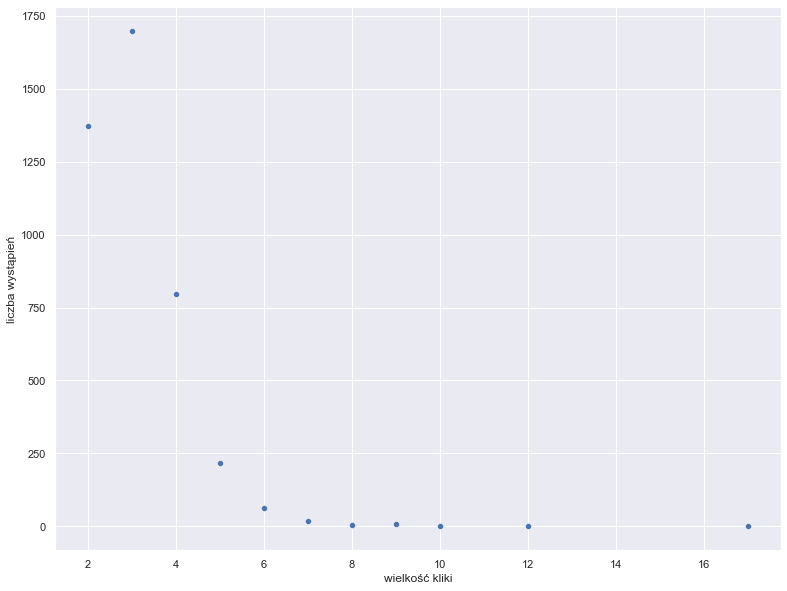

In [2]:
list_of_cliques = [len(x) for x in graph.biggest_clique()]

data = Counter(list_of_cliques)
data = pd.DataFrame(list(zip(data.keys(), data.values())), columns=['wielkość kliki', 'liczba wystąpień'])
plt.figure(figsize=(13,10))
sns.scatterplot(data, x='wielkość kliki',y='liczba wystąpień')

In [3]:
print('średnica', graph.diameter)
print('gęstość', graph.density)

średnica 12
gęstość 0.0035939523621825553
